In [41]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [42]:
m = 4000 # number of points
n = 3 # representation dimension
t = 8 # number of neighbors measured

In [43]:
def t_nearest_matr(m, t, X):
    t_nearest = np.ones((m, t), dtype=int) * 1
    for id, row in enumerate(X.T):
        dif = X.T - row # get vector representation-wise differences
        norm_indices = np.argsort(np.linalg.norm(dif, axis = 1))
        t_nearest[id] = norm_indices[1: t + 1]
    return t_nearest # returns m x t matrix representing k_nearest

In [44]:
def weight_matr(m, N, X, sigma):
    X = X.T # transpose the data matrix for ease in W_ij calculation
    W = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            if (i in N[j]) and (j in N[i]):
                W[i][j] = np.exp(np.linalg.norm(X[i] - X[j]) / (sigma ** 2))
    return W

In [45]:
def diag_matr(m, W):
    D = np.zeros((m, m))
    for i in range(m):
        D[i][i] = np.sum(W[i])
    return D

In [46]:
def get_le_reduced(k, sigma, N, X):
    m = len(X[0])
    W = weight_matr(m, N, X, sigma)
    D = diag_matr(m, W)
    L = D - W

    # Helpful Debug Statements
    # print(f"N sample is {N[:6]}")
    # print(f"W sample is {W[:6]}")
    # print(f"D sample is {D[:6]}")

    eigenvalues, eigenvectors = np.linalg.eig(L)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvectors[-k:] # smallest k eigenvectors (rows)

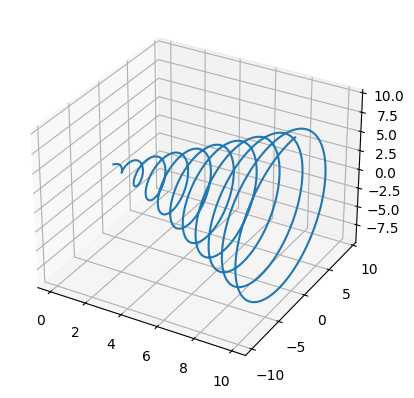

In [47]:
theta = np.linspace(0, 20 * np.pi, m)
r = np.linspace(0, 10, m)
x = r
z = np.cos(theta) * r
y = np.sin(theta) * r
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
plt.show()

In [48]:
X = np.vstack((x, y, z))
X.shape

(3, 4000)

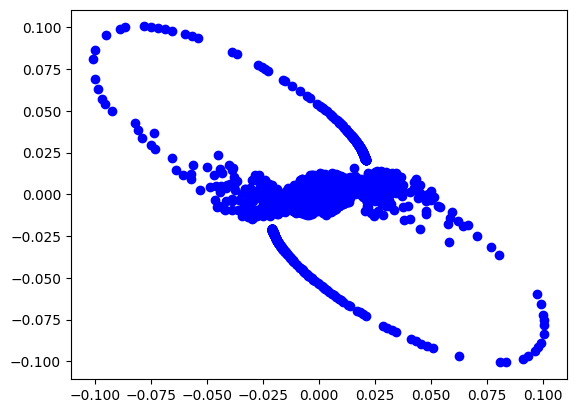

In [49]:
k = 2 # projection dimension
sigma = 1
N = t_nearest_matr(m, t, X)
P = get_le_reduced(k, sigma, N, X)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(P[0, :], P[1, :], c='b', marker='o')
plt.show()

We wish to compare the "Averaged Laplacian Eigenmap" algorithm to the standard
algorithm used by embedding a helix in 2D space. 

In [50]:
def sigmoid(M):
    return 1 / (1 + np.exp(-M))

In [51]:
def radii_matr(s, t, X):
    m = len(X[0])
    radii = np.ones((m, 1))
    N = t_nearest_matr(m, t, X)
    for i in range(m):
        x = X.T[i]
        radii[i] = np.linalg.norm(X.T[N[i]] - x)
    radii = np.ceil(s * sigmoid(radii / ((1 / m) * np.sum(radii))))
    return radii

In [52]:
def nearest_matr(radii, X):
    m = len(X[0])
    max_radius = int(np.max(radii))
    t_nearest = np.ones((m, max_radius), dtype=int) * (-1)
    for id, row in enumerate(X.T):
        dif = X.T - row # get vector representation-wise differences
        norm_indices = np.argsort(np.linalg.norm(dif, axis = 1))
        curr_num = int(radii[id])
        t_nearest[id][: curr_num] = norm_indices[1: curr_num + 1]
    return t_nearest # returns m x max_radius matrix representing k_nearest

In [53]:
# We repeat the helix analysis for ALE:
k = 2 # projection dimension
sigma = 1 
s = 5 # "avg neighbor size"
radii = radii_matr(s, t, X)
print(radii)
N = nearest_matr(radii, X)
N_t = t_nearest_matr(m, t, X)
print(N)
print(N_t)

[[3.]
 [3.]
 [3.]
 ...
 [5.]
 [5.]
 [5.]]
[[   1    2    3   -1   -1]
 [   0    2    3   -1   -1]
 [   1    3    0   -1   -1]
 ...
 [3996 3998 3995 3999 3994]
 [3997 3999 3996 3995 3994]
 [3998 3997 3996 3995 3994]]
[[   1    2    3 ...    6    7    8]
 [   0    2    3 ...    6    7    8]
 [   1    3    0 ...    6    7    8]
 ...
 [3996 3998 3995 ... 3993 3992 3991]
 [3997 3999 3996 ... 3993 3992 3991]
 [3998 3997 3996 ... 3993 3992 3991]]


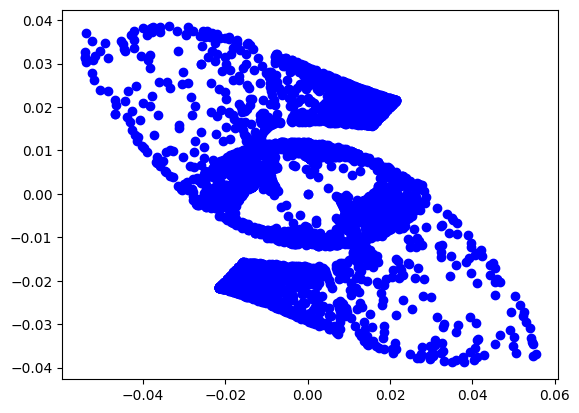

In [54]:
P = get_le_reduced(k, sigma, N, X)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(P[0, :], P[1, :], c='b', marker='o')
plt.show()